In [19]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [20]:
A = np.load('./data/A.npy')
b = np.load('./data/b.npy')
m = A.shape[0]
n = A.shape[1]

In [21]:
# Formulate the problem as an LP
s = 12
x = cp.Variable(n)
z = cp.Variable(n)
t = cp.Variable(1)
prob = cp.Problem(cp.Minimize(t),
                 [A@x-b>= -t, A@x-b <= t, cp.sum(z)<=s, -z<=x, x<=z])
prob.solve()

0.926586040073324

In [22]:
# Solve the problem for a given value of s
def solve_problem(s):
    x = cp.Variable(n)
    z = cp.Variable(n)
    t = cp.Variable(1)
    prob = cp.Problem(cp.Minimize(t),
                     [A@x-b>= -t*np.ones(m), A@x-b<= t*np.ones(m), cp.sum(z)<=s, -z<=x, x<=z])
    prob.solve()
    return prob.value

In [23]:
# Get the dual variable for the constraint cp.sum(z) <= s
y2 = prob.constraints[2].dual_value

# Compute the lower bound for the optimal value of the problem for different values of s
# Also compute the true optimal value for different values of s
s_list = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
lb = []
true = []
for s_p in s_list:
    delta = s_p - s
    lb.append(prob.value - y2 * delta)
    true.append(solve_problem(s_p))

[-0.1414250008566531, -0.10436592039040749, -0.07064937883157585, -0.04045381798359582, -0.024821153194144907, -0.014906908133739405, -0.00644352560368211, -0.0018120447605040058, 0.0, -0.000553406910065557, -0.0023873960628584268, -0.006024141365139846, -0.01079546021621669, -0.01712093923923752, -0.02424410957509926, -0.032506353975995994, -0.042556694979797416]


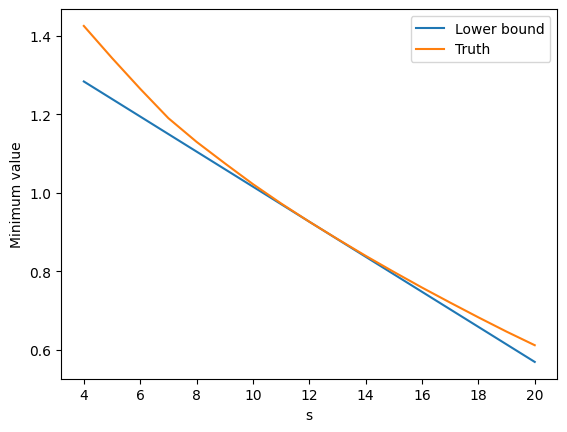

In [24]:
# Plot the lower bound and the true optimal value as a function of s
plt.plot(s_list, lb, label='Lower bound')
plt.plot(s_list, true, label='Truth')
plt.xlabel('s')
plt.ylabel('Minimum value')
plt.legend()

plt.savefig('comparison.pdf')

print([x - y for (x, y) in zip(lb, true)])